# Quickstart

This notebook shows a quickstart of `daskperiment`.

In [1]:
%matplotlib inline
import numpy as np
import daskperiment

First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [2]:
ex = daskperiment.Experiment(id='quickstart_pj')

2019-01-25 08:30:36,974 [daskperiment.core.experiment] [INFO] Experiment(id: quickstart_pj, version: 0) is being initialized
2019-01-25 08:30:36,981 [daskperiment.core.environment] [INFO] Platform: Darwin 17.7.0
2019-01-25 08:30:36,989 [daskperiment.core.environment] [INFO] Processor: i386
2019-01-25 08:30:36,992 [daskperiment.core.environment] [INFO] Packagge path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-25 08:30:36,993 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-25 08:30:36,995 [daskperiment.core.experiment] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/cache/quickstart_pj_0


Then, use `Experiment.parameter` method to define parameters (input variables for the experiment). The actual value of each parameter can be changed in every trial.

In [3]:
a = ex.parameter('a')
b = ex.parameter('b')
a

Parameter(a: Undefined)

Next, you can define each experiment step (function) by decorating with `Experiment` instance (`@ex`).

Note that the function to output the final result (mostly objective value to be minimized or maximized) must be decorated with `Experiment.result`. The chain of these functions are expressed as `Dask.Delayed` instance.

In [4]:
@ex
def prepare_data(a, b):
    return a + b

@ex.result
def calculate_score(s):
    return s + 1

d = prepare_data(a, b)
s = calculate_score(d)
s

Delayed('calculate_score-f71034e4-2a96-4d95-8070-3a1d80725b58')

Thus, you can visualize computation graph via `.visualize` method.

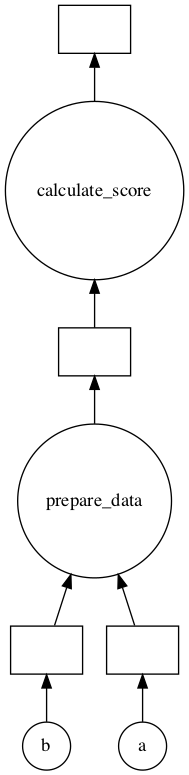

In [5]:
s.visualize()

Use `Experiment.set_parameters` method to set parameters for a trial. After setting parameters, `Parameter` variable and experiment result will be computable.

Parameters are recommended to be a scalar (or lightweight value) because these are stored as history (for example, passing filename as a parameter is　preffered rather than passing `DataFrame`).

In [6]:
ex.set_parameters(a=1, b=2)
a.compute()

2019-01-25 08:30:44,278 [daskperiment.core.experiment] [INFO] Updated parameters: a=1, b=2


1

In [7]:
s.compute()

2019-01-25 08:30:44,757 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=1)
2019-01-25 08:30:44,759 [daskperiment.core.experiment] [INFO] Target: calculate_score-f71034e4-2a96-4d95-8070-3a1d80725b58
2019-01-25 08:30:44,760 [daskperiment.core.experiment] [INFO] Parameters: a=1, b=2
2019-01-25 08:30:44,765 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=1)


4

You can update any parameters for next trial. Every trials can be distinguished by trial id.

In [8]:
ex.set_parameters(b=3)
s.compute()

2019-01-25 08:30:47,224 [daskperiment.core.experiment] [INFO] Updated parameters: a=1, b=3
2019-01-25 08:30:47,226 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=2)
2019-01-25 08:30:47,228 [daskperiment.core.experiment] [INFO] Target: calculate_score-f71034e4-2a96-4d95-8070-3a1d80725b58
2019-01-25 08:30:47,229 [daskperiment.core.experiment] [INFO] Parameters: a=1, b=3
2019-01-25 08:30:47,233 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=2)


5

After some trials, you can retrieve parameter values specifying trial id.

In [9]:
ex.get_parameters(trial_id=1)

{'a': 1, 'b': 2}

In [10]:
ex.get_parameters(trial_id=2)

{'a': 1, 'b': 3}

`Experiment.get_history` will return a `DataFrame` which stores a history of trial parameters and its results. You can select desirable trial using `pandas` basic operation.

In [11]:
ex.get_history()

,a,b,Result,Finished,Process Time
Trial ID,,,,,
1,1,2,4,2019-01-25 08:30:44.765358,00:00:00.008401
2,1,3,5,2019-01-25 08:30:47.233608,00:00:00.007053


# Handling intermediate result

Next example shows how to retrieve an intermediate result of the chain.

After creating another `Experiment` instance, use `Experiment.persist` decorator at the function to keep its intermediate result. Other usages are all the same. Note that an intermediate result is saved as a pickle file named with its function name, function name must be unique in the experiment.

In [12]:
ex2 = daskperiment.Experiment(id='persist_pj')

a = ex2.parameter('a')
b = ex2.parameter('b')

@ex2.persist
def prepare_data(a, b):
    return a + b

@ex2.result
def calculate_score(s):
    return s + 1

d = prepare_data(a, b)
s = calculate_score(d)

2019-01-25 08:30:50,469 [daskperiment.core.experiment] [INFO] Experiment(id: persist_pj, version: 0) is being initialized
2019-01-25 08:30:50,471 [daskperiment.core.environment] [INFO] Platform: Darwin 17.7.0
2019-01-25 08:30:50,473 [daskperiment.core.environment] [INFO] Processor: i386
2019-01-25 08:30:50,475 [daskperiment.core.environment] [INFO] Packagge path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-25 08:30:50,476 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-25 08:30:50,478 [daskperiment.core.experiment] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/cache/persist_pj_0


Performing some trials.

In [13]:
ex2.set_parameters(a=1, b=2)
s.compute()

2019-01-25 08:30:52,287 [daskperiment.core.experiment] [INFO] Updated parameters: a=1, b=2
2019-01-25 08:30:52,290 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=1)
2019-01-25 08:30:52,292 [daskperiment.core.experiment] [INFO] Target: calculate_score-69582c29-050d-4d55-b03b-9bab09df3be9
2019-01-25 08:30:52,293 [daskperiment.core.experiment] [INFO] Parameters: a=1, b=2
2019-01-25 08:30:52,297 [daskperiment.core.experiment] [INFO] Saving intermediate result (trial id=1): prepare_data(path=cache/persist_pj_0/persist_pj_0_prepare_data_1.pkl)
2019-01-25 08:30:52,301 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=1)


4

In [14]:
ex2.set_parameters(a=3, b=2)
s.compute()

2019-01-25 08:30:52,596 [daskperiment.core.experiment] [INFO] Updated parameters: a=3, b=2
2019-01-25 08:30:52,598 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=2)
2019-01-25 08:30:52,599 [daskperiment.core.experiment] [INFO] Target: calculate_score-69582c29-050d-4d55-b03b-9bab09df3be9
2019-01-25 08:30:52,600 [daskperiment.core.experiment] [INFO] Parameters: a=3, b=2
2019-01-25 08:30:52,603 [daskperiment.core.experiment] [INFO] Saving intermediate result (trial id=2): prepare_data(path=cache/persist_pj_0/persist_pj_0_prepare_data_2.pkl)
2019-01-25 08:30:52,605 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=2)


6

You can retrieve an intermediate results via `Experiment.get_persisted` method by specifying function name and trial id.

In [15]:
ex2.get_persisted('prepare_data', trial_id=1)

3

In [16]:
ex2.get_persisted('prepare_data', trial_id=2)

5

# Monitoring metrics

You may want to monitor transition of some metrics during each trial. Each experiment function can call `Experiment.save_metric` to save metric with its key (name) and epoch.

In [17]:
ex3 = daskperiment.Experiment(id='metric_pj')

a = ex3.parameter('a')
b = ex3.parameter('b')

@ex3
def prepare_data(a, b):
    return a + b

@ex3.result
def calculate_score(s):
    for i in range(100):
        ex3.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return s + 1

d = prepare_data(a, b)
s = calculate_score(d)

2019-01-25 08:30:56,430 [daskperiment.core.experiment] [INFO] Experiment(id: metric_pj, version: 0) is being initialized
2019-01-25 08:30:56,432 [daskperiment.core.environment] [INFO] Platform: Darwin 17.7.0
2019-01-25 08:30:56,434 [daskperiment.core.environment] [INFO] Processor: i386
2019-01-25 08:30:56,435 [daskperiment.core.environment] [INFO] Packagge path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-25 08:30:56,436 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-25 08:30:56,438 [daskperiment.core.experiment] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/cache/metric_pj_0


In [18]:
ex3.set_parameters(a=1, b=2)
s.compute()

2019-01-25 08:30:57,867 [daskperiment.core.experiment] [INFO] Updated parameters: a=1, b=2
2019-01-25 08:30:57,869 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=1)
2019-01-25 08:30:57,870 [daskperiment.core.experiment] [INFO] Target: calculate_score-3eecc247-e684-4711-ad22-ac68cd3ed238
2019-01-25 08:30:57,871 [daskperiment.core.experiment] [INFO] Parameters: a=1, b=2
2019-01-25 08:30:57,876 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=1)


4

After a trial, you can load saved metric using `Experiment.load_metric` specifying its name and trial_id. As it is returned as `DataFrame`, you can easily investigate it.

In [19]:
dummy_score = ex3.load_metric('dummy_score', trial_id=1)
dummy_score.head()

,1
Epoch,
0,100.000000
1,99.154009
2,98.861870
3,97.282600
4,98.516720


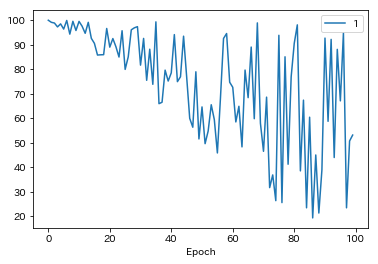

In [20]:
dummy_score.plot()

Perform another trial.

In [21]:
ex3.set_parameters(a=3, b=4)
s.compute()

2019-01-25 08:31:03,274 [daskperiment.core.experiment] [INFO] Updated parameters: a=3, b=4
2019-01-25 08:31:03,284 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=2)
2019-01-25 08:31:03,287 [daskperiment.core.experiment] [INFO] Target: calculate_score-3eecc247-e684-4711-ad22-ac68cd3ed238
2019-01-25 08:31:03,300 [daskperiment.core.experiment] [INFO] Parameters: a=3, b=4
2019-01-25 08:31:03,312 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=2)


8

To compare metrics between trials, pass multiple trial ids to `Experiment.load_metric`.

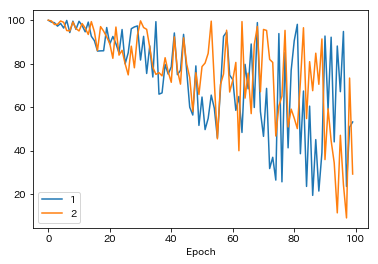

In [22]:
ex3.load_metric('dummy_score', trial_id=[1, 2]).plot()